In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
%matplotlib inline

In [21]:
def prepare_matrices(x, y):
    '''
    This function prepares x matrix (by adding a dummy feature, x0) and confirms whether shapes of x and y matrix match.
    Dummy feature: Feature whose value is 1
    
    Arguements:
    x: Feature Matrix (numpy array of shape (m, n), m = number of examples, n = number of features)
    y: Output Vector / Target Vector (numpy array of shape (m, 1))
    
    Returns:
    x: Feature Matrix (numpy array of shape (m, n+1)
    y = Output Vector / Target Vector (numpy array of shape (m, 1))
    '''
    m = x.shape[0]
    n = x.shape[1]
    x_0 = np.ones(shape = (m, 1))
    x_1 = x.reshape((m, n))
    x = np.concatenate((x_0, x_1), axis = 1)
    y = y.reshape((m, 1))
    return x, y

In [22]:
def initialize_parameter_matrix(n, method = 'zeros'):
    '''
    This function initializes parameter matrix.
    
    Arguements:
    n: Number of features (This include dummy featue x0)
    method: zeros / random. The method used to initialize paramter matrix.
    (default: 'zeros', i.e. initialization with zeros)
    
    Returns:
    theta: Parameter matrix of shape (n, 1), n = number of features 
    '''
    if method == 'zeros':
        theta = np.zeros(shape = (n, 1))
    elif method == 'random':
        theta = np.random.rand(n, 1)
    assert(theta.shape == (n, 1))
    return theta

In [23]:
def hypothesis_calc(theta, x):
    '''
    This function calculates hypothesis matrix.
    
    Arguements:
    theta: Parameter matrix of shape (n, 1), n = number of features
    x: Feature matrix of shape (m, n), m = number of training examples
    
    Returns:
    h: Calculated hypothesis matrix of shape (m, 1)
    '''
    m = x.shape[0]
    g = np.sum(np.multiply(np.transpose(theta), x), axis = 1)
    g = g.reshape((m, 1))
    h = np.where(g >= 0, 1, 0)
    return h

In [24]:
def early_stopping_check(acc_list):
    '''
    This function decides whether to perform early stopping for perceptron algorithm
    
    Arguements:
    acc_list: List of accuracy values
    
    Returns:
    stop: Boolean value to decide whether algorithm shall be stopped or not.
          The algorithm is stopped if the values of accuracy in the list are same (i.e. accuracy is unchanged for
          the number of iterations equal to length of the list)
    '''
    first_elem = acc_list[0]
    stop = True
    for i in acc_list:
        if i != first_elem:
            stop = False
    return stop

In [25]:
def perceptron(x, y, num_iterations = 100, 
                                   learning_rate = 0.01, verbose = True, initialization = 'zeros', n_iter_no_change = 10):
    '''
    This function performs binnary classification using Perceptron algorithm.
    
    Arguements:
    x: Feature matrix of shape (m, n), m = number of training examples, n = number of features
    y: Output matrix of shape (m, 1)
    num_iterations (optional): Max number of iterations (default value: 100)
                               Algorithm will be stopped early if condition for early stopping is satisfied
    learning_rate (optional): Value for learning rate (default value: 0.01)
    verbose (optional): Boolean value which decide whether the output of the algorithm will be verbose
    initialization (optional): 'zeros' / 'random', parameter used for method of initialization of parameter matrix
    
    Returns:
    theta: Parameter matrix of shape (n, 1)
    acc_list: List of accuracy values for each iteration
    
    Note: Ensure that dummy variable (x0) has been already added to the x matrix before passing through this function
    '''
    m = x.shape[0]
    n = x.shape[1]
    theta = initialize_parameter_matrix(n, method = initialization)
    h = hypothesis_calc(theta, x)
    acc, _, _, _ = metrics_calc(y, h)
    acc_list = []
    acc_list.append(acc)
    if verbose:
        print('Initial Classification Accuracy: {}'.format(acc))
    for i in range(num_iterations):
        index = i % (m - 1)
        for j in range(n):
            theta[j][0] = theta[j][0] - learning_rate * (h[index] - y[index]) * x[index, :][j]
        h = hypothesis_calc(theta, x)
        acc, _, _, _ = metrics_calc(y, h)
        if verbose:
            print('Classification Accuracy After Iteration {} : {}'.format(i+1, acc))
        acc_list.append(acc)
        if i > n_iter_no_change:
            early_stopping = early_stopping_check(acc_list[-n_iter_no_change:])
            if early_stopping and verbose:
                print('Stopping Algorithm Early')
                break
    return theta, acc_list

In [26]:
def metrics_calc(y, y_pred):
    '''
    This function calculates metrics of binary classifier.
    
    Arguements:
    y: Array of true labels
    y_pred: Array of predicted labels
    
    Returns:
    A tuple of accuracy, precision, recall and f1 score in percentages and round to 2 decimal digits
    '''
    tp = 0
    fp = 0
    fn = 0
    acc_count = 0
    for i, j in zip(y, y_pred):
        if i == j:
            acc_count = acc_count + 1
        if i == 1 and j == 1:
            tp = tp + 1
        if i == 0 and j == 1:
            fp = fp + 1
        if i == 1 and j == 0:
            fn = fn + 1
    accuracy = acc_count / y.shape[0]
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1 = (2 * precision * recall) / (precision + recall)
    return round(accuracy * 100, 2), round(precision * 100, 2), round(recall * 100, 2), round(f1 * 100, 2)

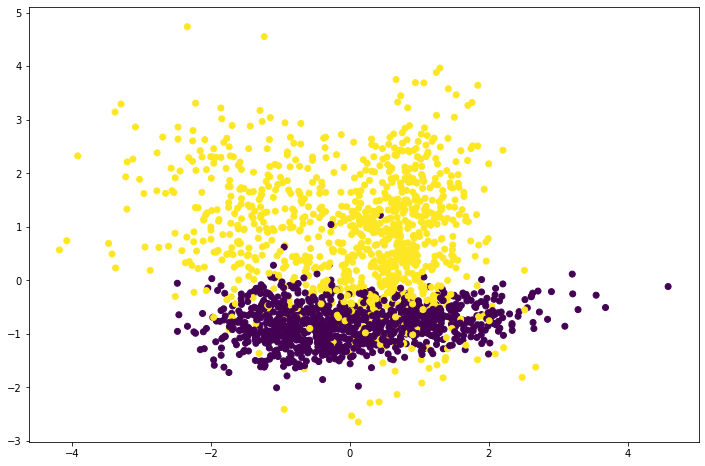

In [27]:
X, y = datasets.make_classification(n_samples = 2000, n_features = 2, n_redundant = 0, n_repeated = 0, n_classes = 2,
                                   n_clusters_per_class = 2, class_sep = 0.8, random_state = 20)
plt.figure(figsize = (12, 8))
plt.scatter(X[:, 0], X[:, 1], c = y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# scaler = MinMaxScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)
X_train, y_train = prepare_matrices(X_train, y_train)
X_test, y_test = prepare_matrices(X_test, y_test)

In [28]:
theta, acc = perceptron(X_train, y_train, num_iterations = 30)

Initial Classification Accuracy: 49.2
Classification Accuracy After Iteration 1 : 49.2
Classification Accuracy After Iteration 2 : 64.2
Classification Accuracy After Iteration 3 : 82.4
Classification Accuracy After Iteration 4 : 73.6
Classification Accuracy After Iteration 5 : 78.93
Classification Accuracy After Iteration 6 : 78.93
Classification Accuracy After Iteration 7 : 78.93
Classification Accuracy After Iteration 8 : 78.93
Classification Accuracy After Iteration 9 : 78.93
Classification Accuracy After Iteration 10 : 78.93
Classification Accuracy After Iteration 11 : 78.93
Classification Accuracy After Iteration 12 : 78.93
Classification Accuracy After Iteration 13 : 78.93
Classification Accuracy After Iteration 14 : 79.4
Classification Accuracy After Iteration 15 : 79.4
Classification Accuracy After Iteration 16 : 86.13
Classification Accuracy After Iteration 17 : 86.13
Classification Accuracy After Iteration 18 : 86.13
Classification Accuracy After Iteration 19 : 86.13
Classifi

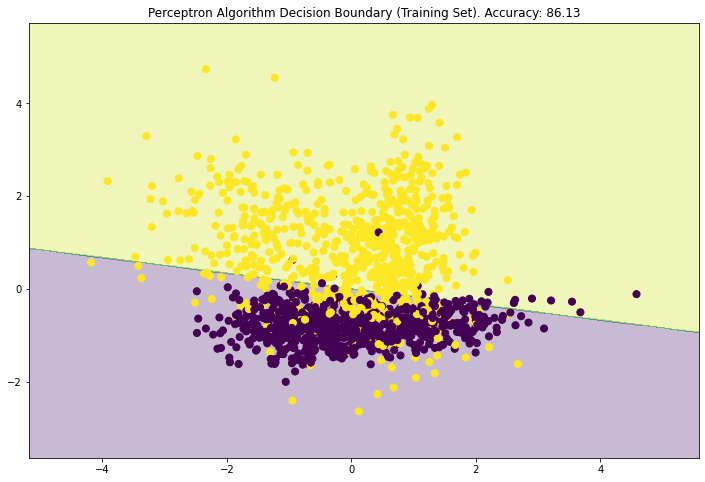

In [29]:
plt.figure(figsize = (12, 8))
h = 0.02
x_min, x_max = X_train[:, 1].min()-1, X_train[:, 1].max()+1
y_min, y_max = X_train[:, 2].min()-1, X_train[:, 2].max()+1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
m = xx.ravel().shape[0]
x_ones = np.ones((m, 1))
x_mat = np.concatenate((x_ones, xx.ravel().reshape(m, 1), yy.ravel().reshape(m, 1)), axis = 1)
pred = hypothesis_calc(theta, x_mat)
pred = pred.reshape(xx.shape)
plt.contourf(xx, yy, pred, alpha = 0.3)
plt.scatter(X_train[:, 1], X_train[:, 2], c = y_train, s = 50, marker = 'o')
plt.title('Perceptron Algorithm Decision Boundary (Training Set). Accuracy: {}'.format(acc[-1]));

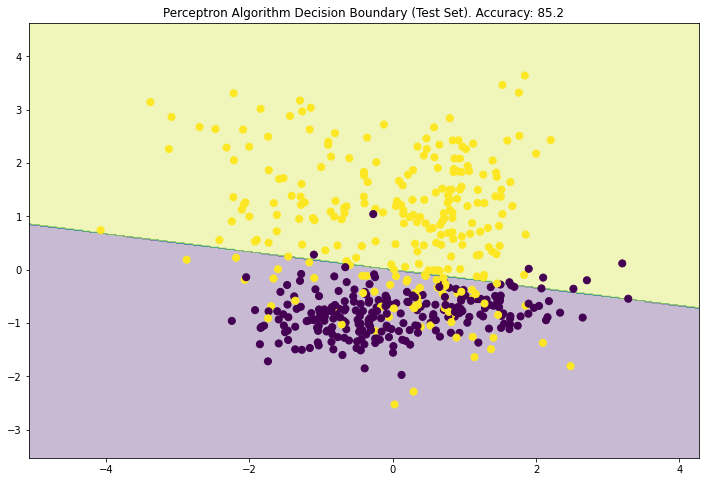

In [30]:
plt.figure(figsize = (12, 8))
h = 0.02
x_min, x_max = X_test[:, 1].min()-1, X_test[:, 1].max()+1
y_min, y_max = X_test[:, 2].min()-1, X_test[:, 2].max()+1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
m = xx.ravel().shape[0]
x_ones = np.ones((m, 1))
x_mat = np.concatenate((x_ones, xx.ravel().reshape(m, 1), yy.ravel().reshape(m, 1)), axis = 1)
pred = hypothesis_calc(theta, x_mat)
pred = pred.reshape(xx.shape)
plt.contourf(xx, yy, pred, alpha = 0.3)
plt.scatter(X_test[:, 1], X_test[:, 2], c = y_test, s = 50, marker = 'o')
acc, _, _, _ = metrics_calc(y_test, hypothesis_calc(theta, X_test))
plt.title('Perceptron Algorithm Decision Boundary (Test Set). Accuracy: {}'.format(acc));